<img src="./IMTA.png" alt="Logo IMT Atlantique" width="300"/>

##  **Introduction à PyTorch/MONAI - Structuration d’un projet de Deep Learning**
## TAF Health - UE B - 2025/2026 

Pierre-Henri.Conze@imt-atlantique.fr - Vincent.Jaouen@imt-atlantique.fr


# 01 — Segmentation (modèle simple)

In [1]:
import sys, os, tqdm
sys.path.append(os.path.abspath(".."))
import torch
from monai.networks.nets import UNet
from monai.losses import DiceCELoss
from monai.metrics import DiceMetric
from utils.data_utils import get_seg2d_dataloaders
from models.simple_models import build_simple_model

Loading dataset: 100%|██████████| 3/3 [00:00<00:00, 27.29it/s]


Epoch 1/50


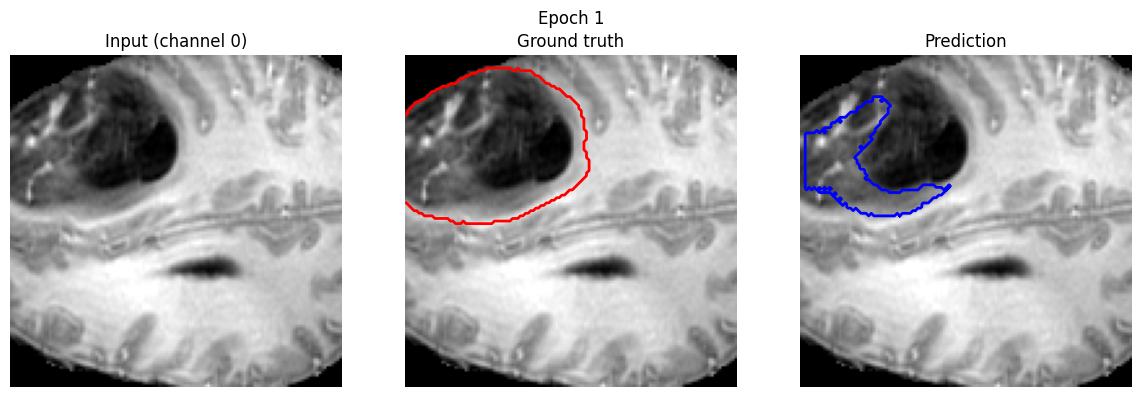

  Loss: 1.3458, Val Dice: 0.2192
Epoch 2/50


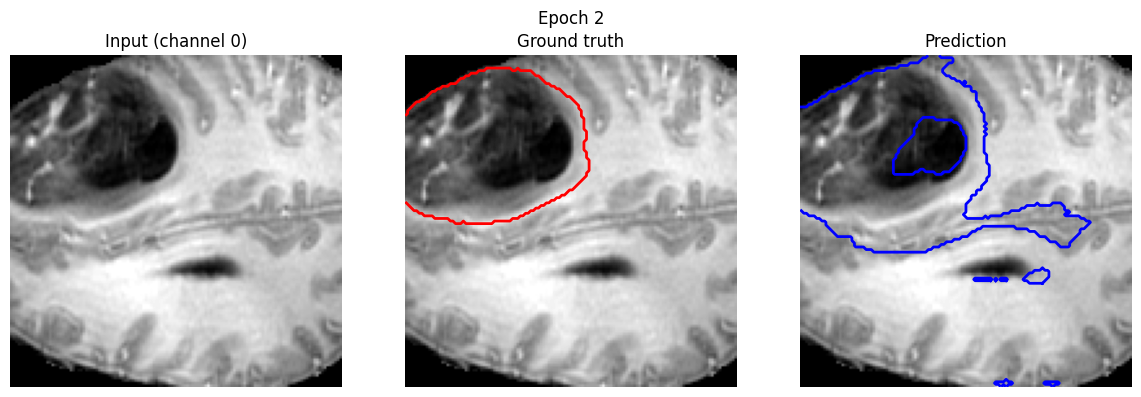

  Loss: 0.6402, Val Dice: 0.7722
Epoch 3/50


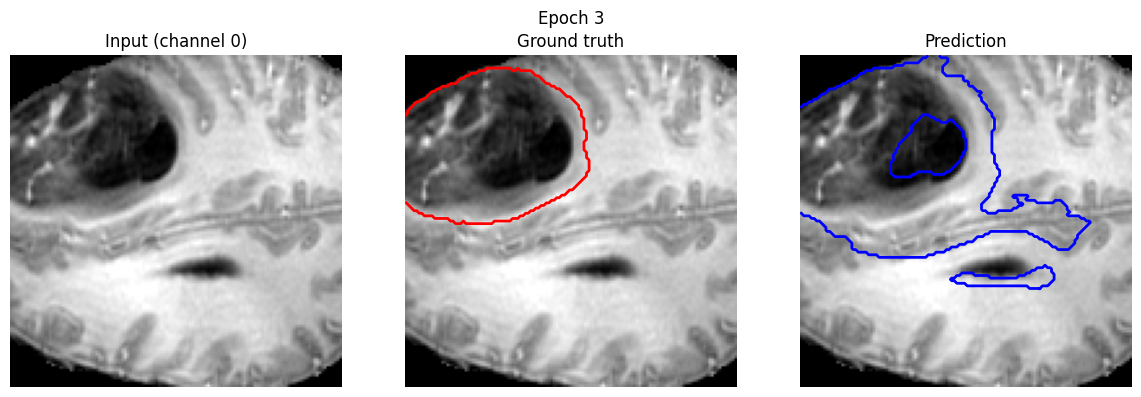

  Loss: 0.4531, Val Dice: 0.8164
Epoch 4/50


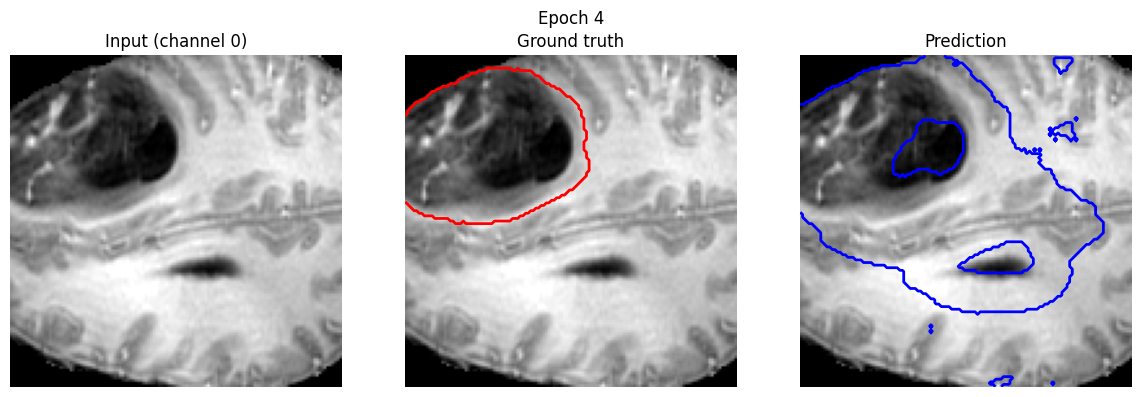

  Loss: 0.4437, Val Dice: 0.8466
Epoch 5/50


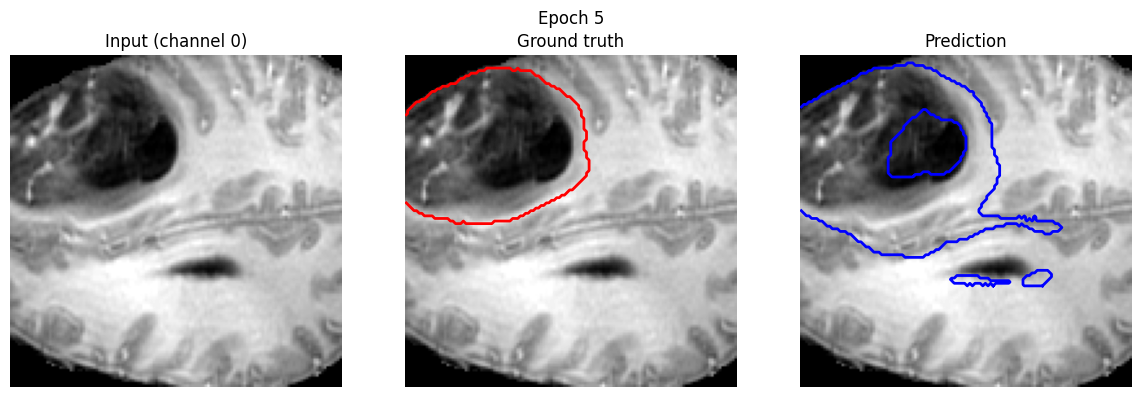

  Loss: 0.4297, Val Dice: 0.8061
Epoch 6/50


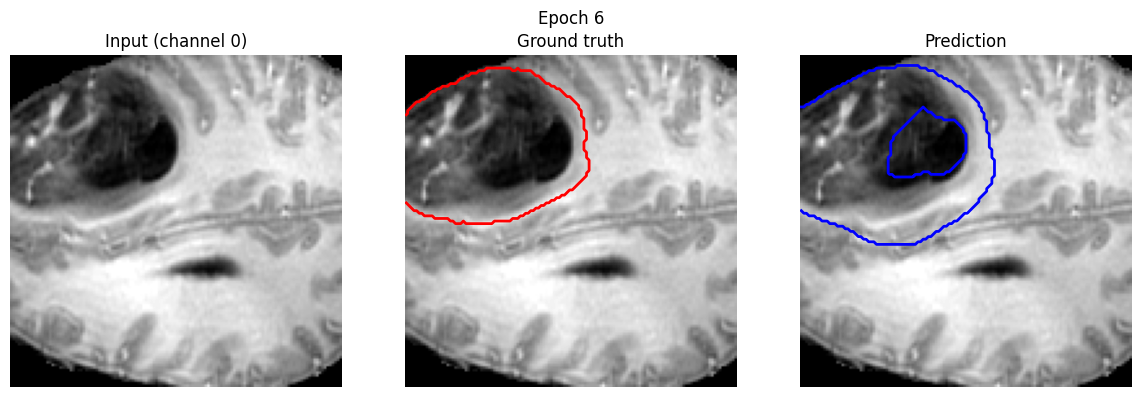

  Loss: 0.4079, Val Dice: 0.7910
Epoch 7/50


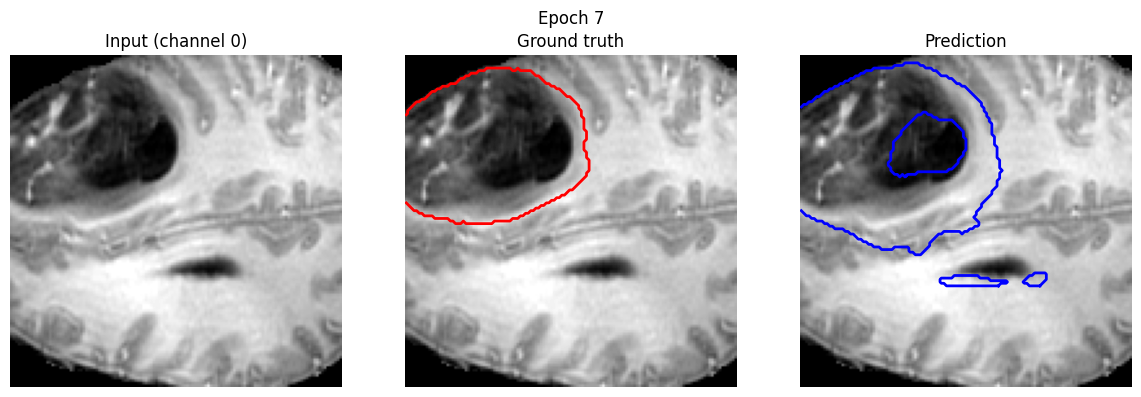

  Loss: 0.3873, Val Dice: 0.8256
Epoch 8/50


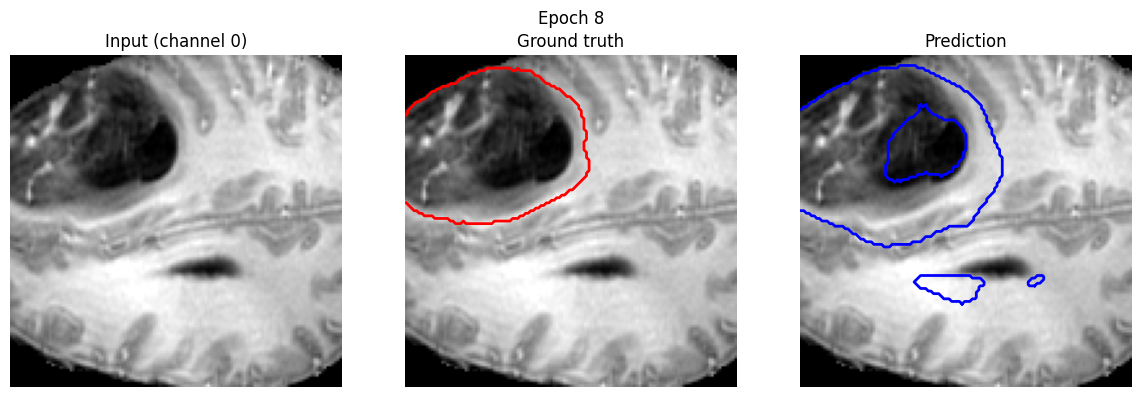

  Loss: 0.3690, Val Dice: 0.8042
Epoch 9/50


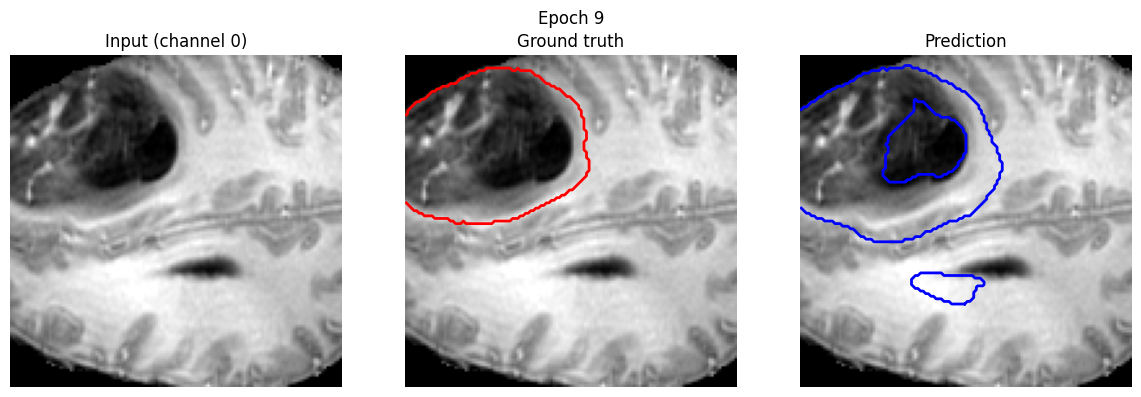

  Loss: 0.3564, Val Dice: 0.7827
Epoch 10/50


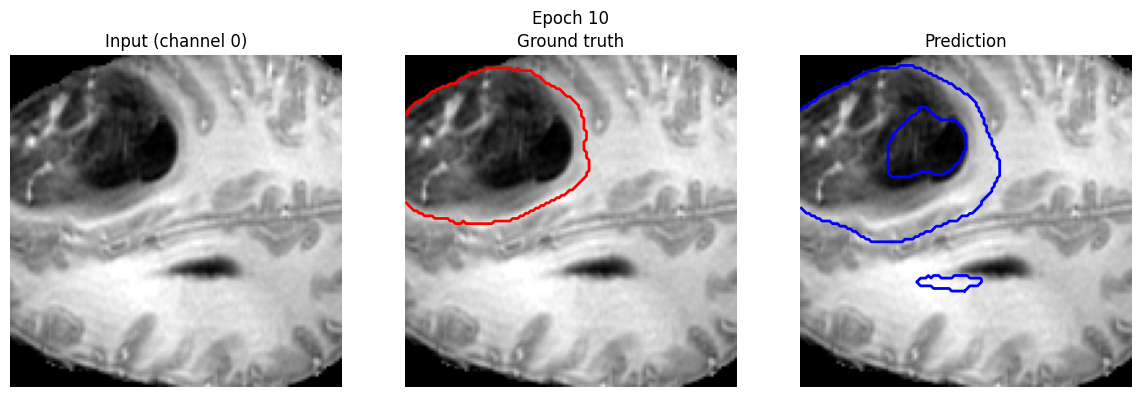

  Loss: 0.3633, Val Dice: 0.7956
Epoch 11/50


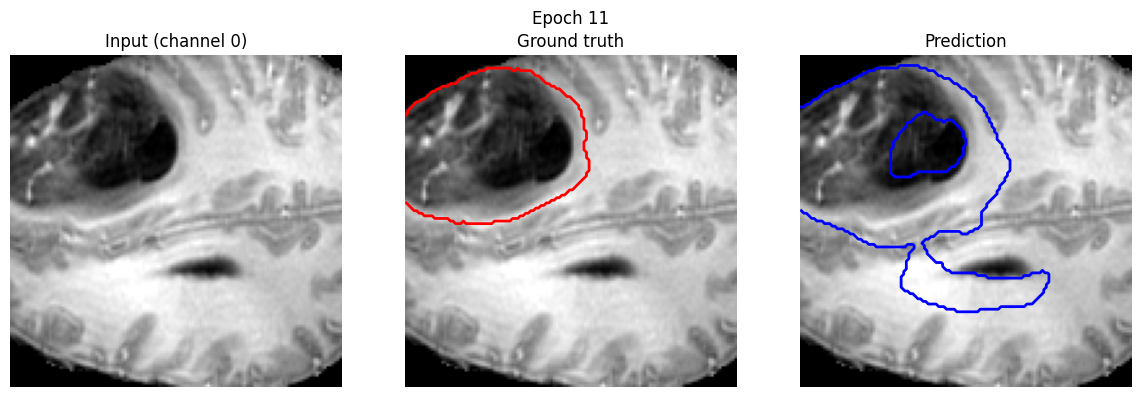

  Loss: 0.3512, Val Dice: 0.8293
Epoch 12/50


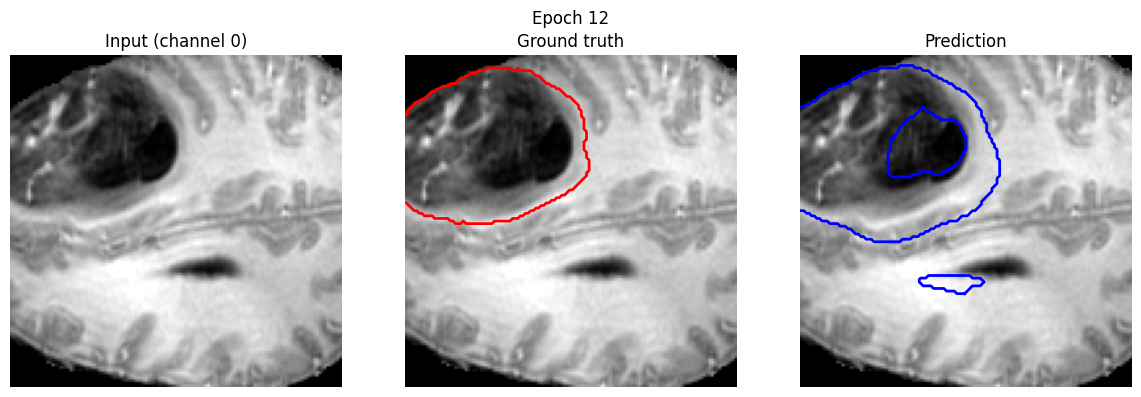

  Loss: 0.3485, Val Dice: 0.8111
Epoch 13/50


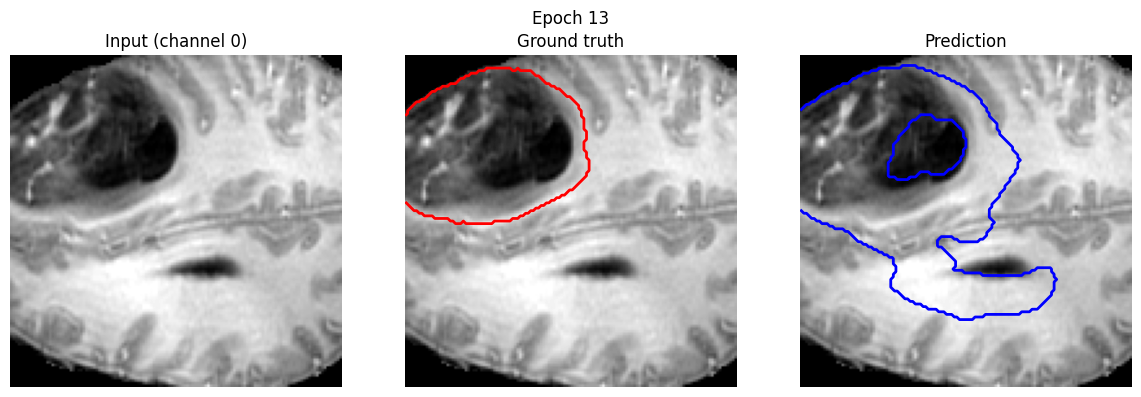

  Loss: 0.3382, Val Dice: 0.8547
Epoch 14/50


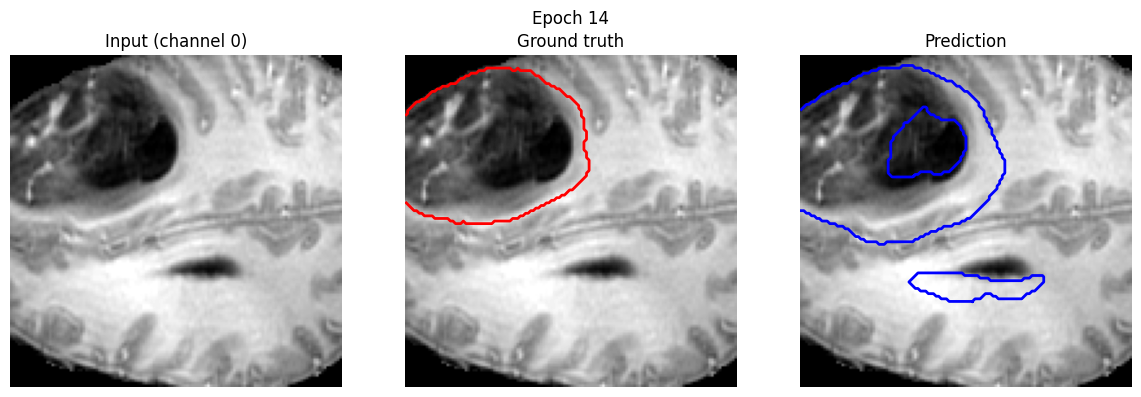

  Loss: 0.3491, Val Dice: 0.8229
Epoch 15/50


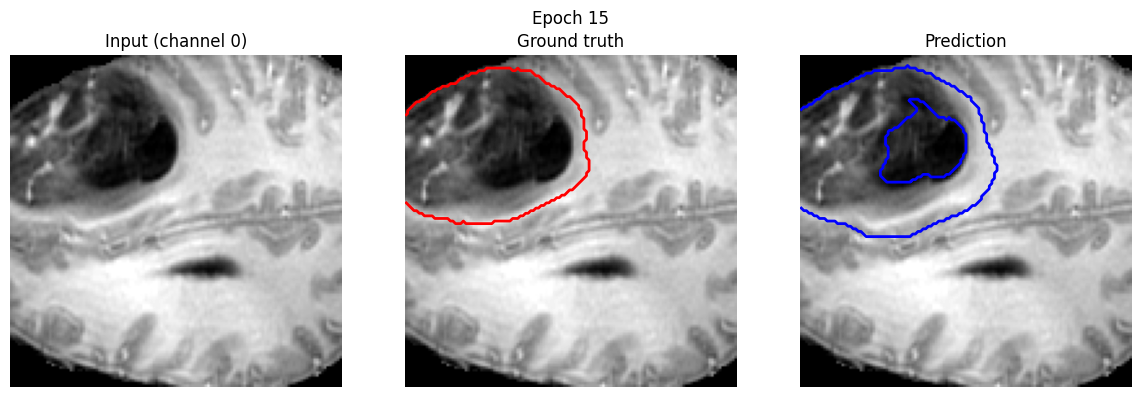

  Loss: 0.3391, Val Dice: 0.8068
Epoch 16/50


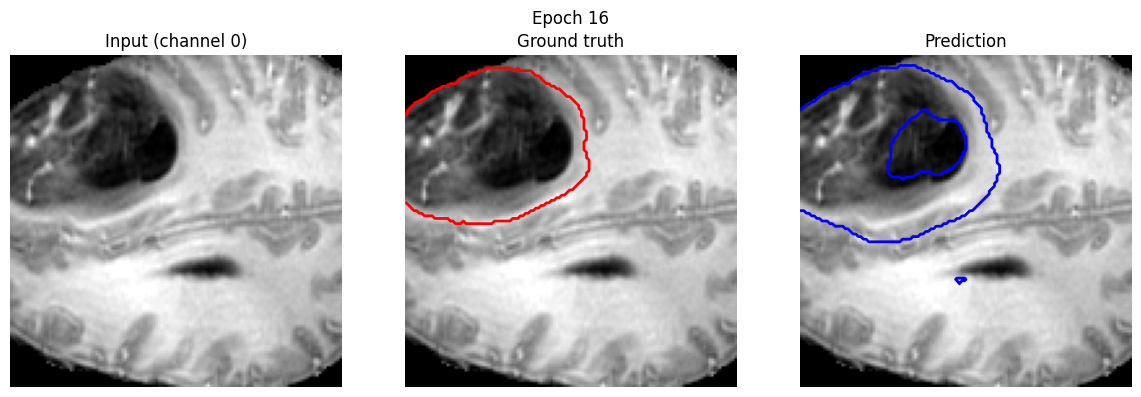

  Loss: 0.3287, Val Dice: 0.8280
Epoch 17/50


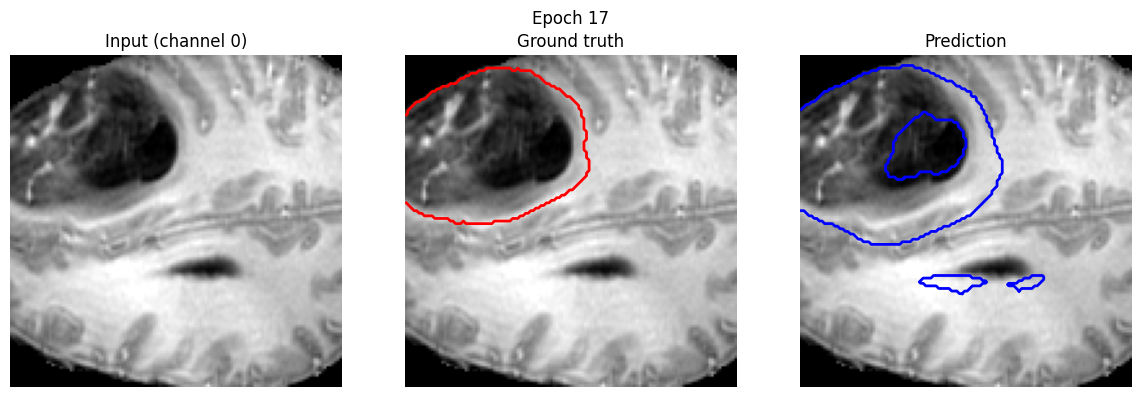

  Loss: 0.3219, Val Dice: 0.8600
Epoch 18/50


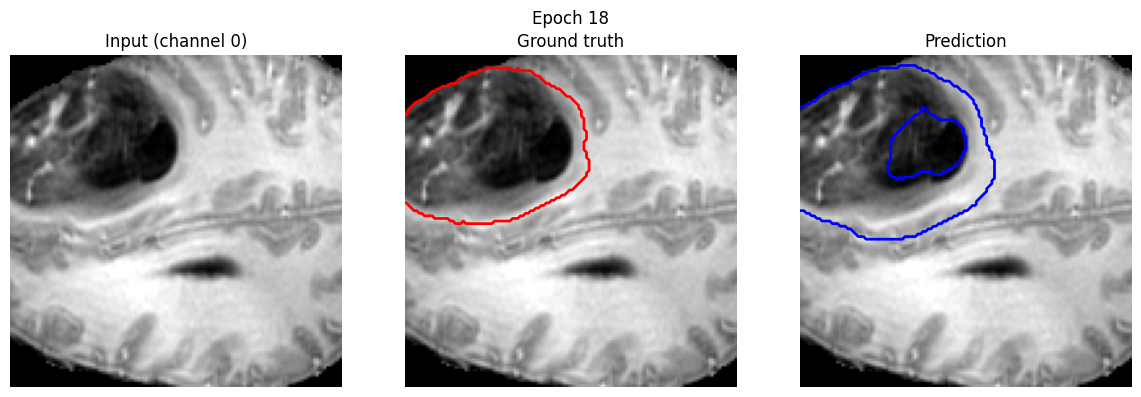

  Loss: 0.3390, Val Dice: 0.8279
Epoch 19/50


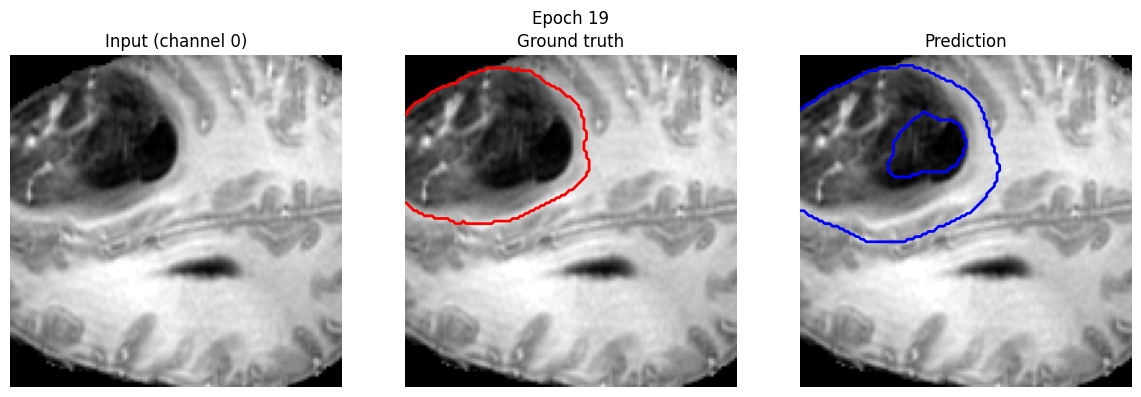

  Loss: 0.3294, Val Dice: 0.8498
Epoch 20/50


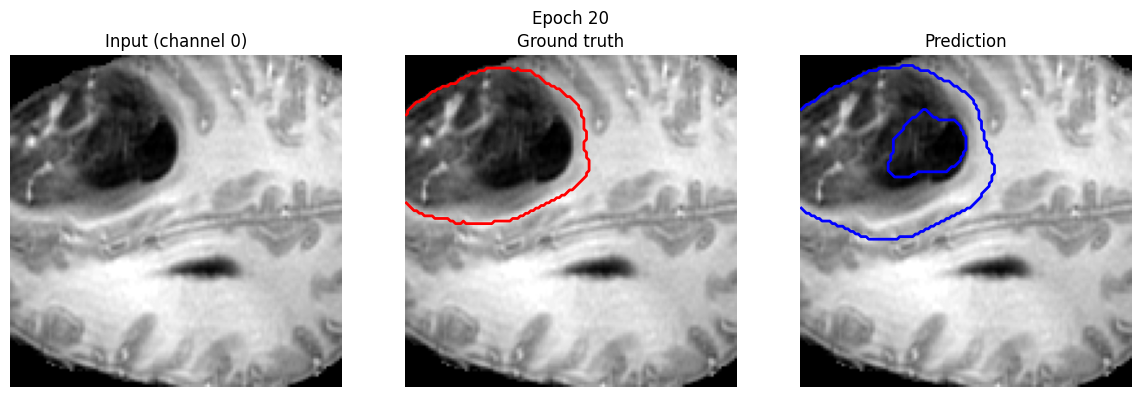

  Loss: 0.3246, Val Dice: 0.8257
Epoch 21/50


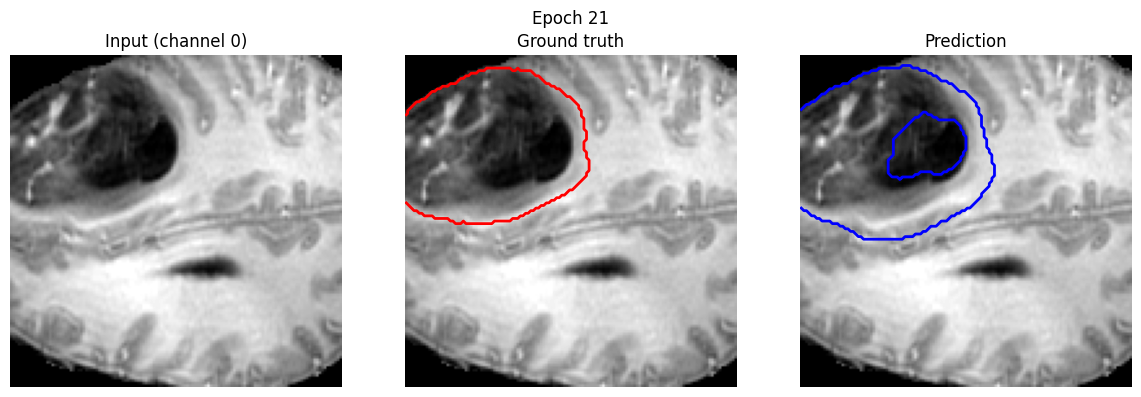

  Loss: 0.3203, Val Dice: 0.8431
Epoch 22/50


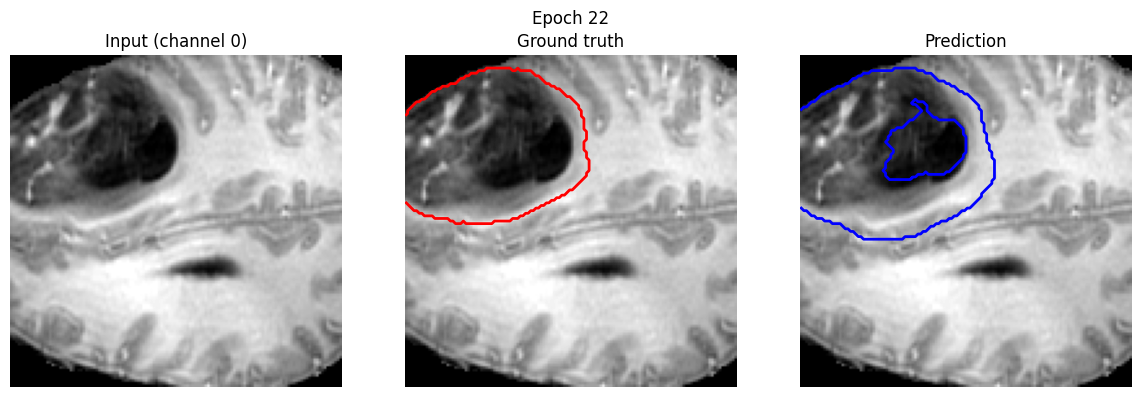

  Loss: 0.3273, Val Dice: 0.8367
Epoch 23/50


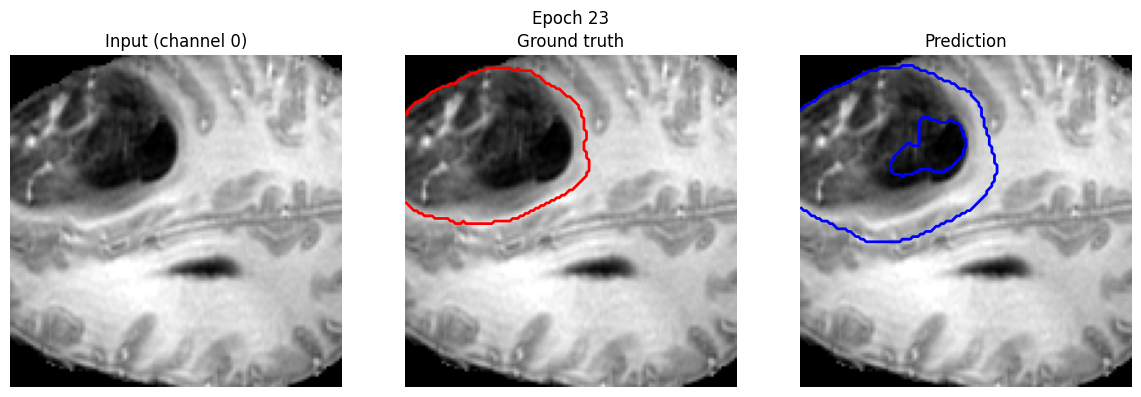

  Loss: 0.3077, Val Dice: 0.8305
Epoch 24/50


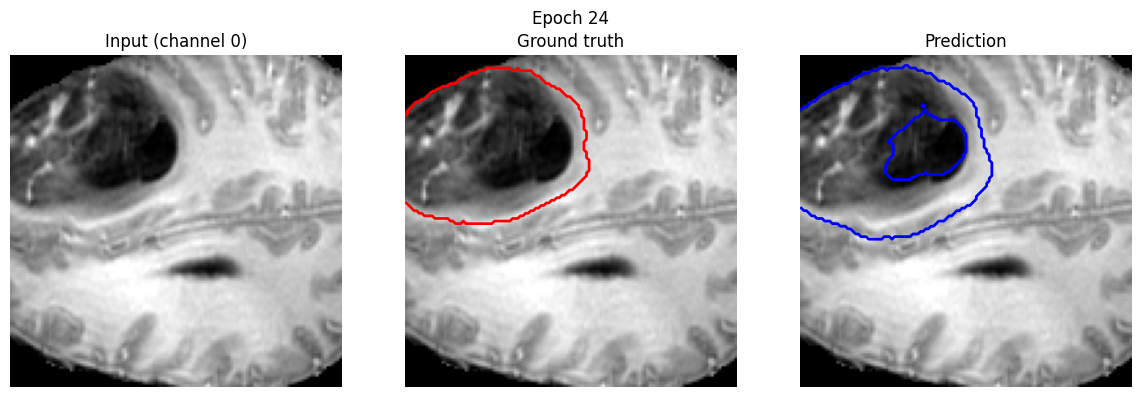

  Loss: 0.3152, Val Dice: 0.8346
Epoch 25/50


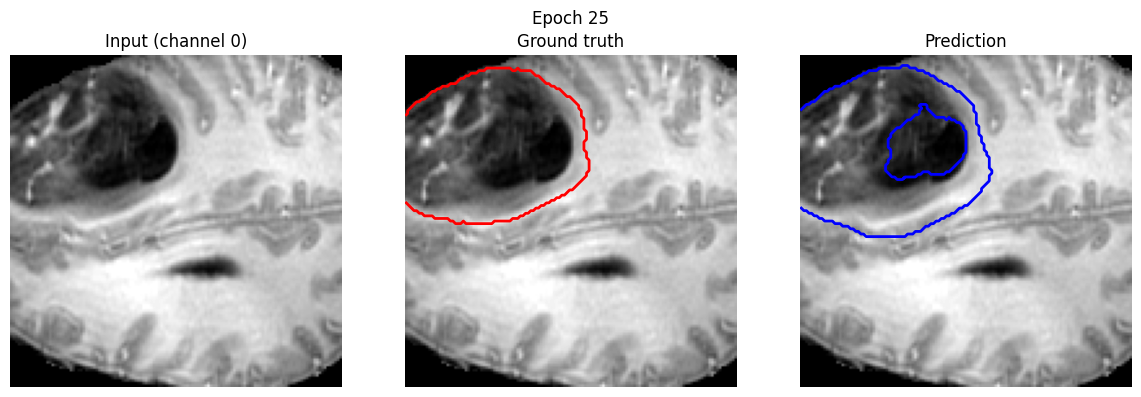

  Loss: 0.3135, Val Dice: 0.8481
Epoch 26/50


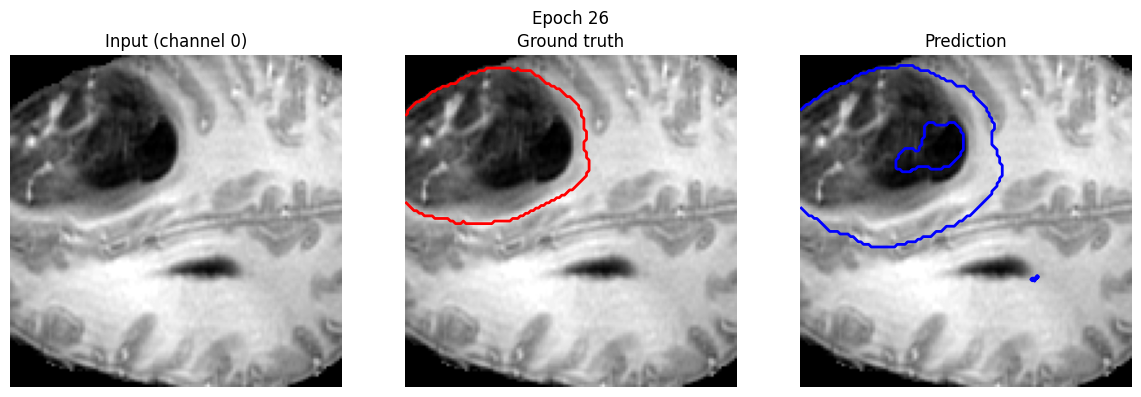

  Loss: 0.3053, Val Dice: 0.8639
Epoch 27/50


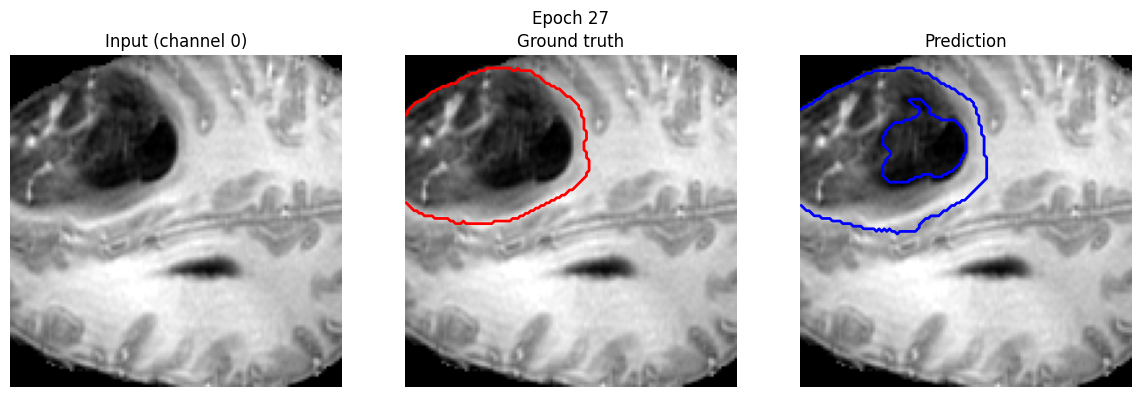

  Loss: 0.3033, Val Dice: 0.8177
Epoch 28/50


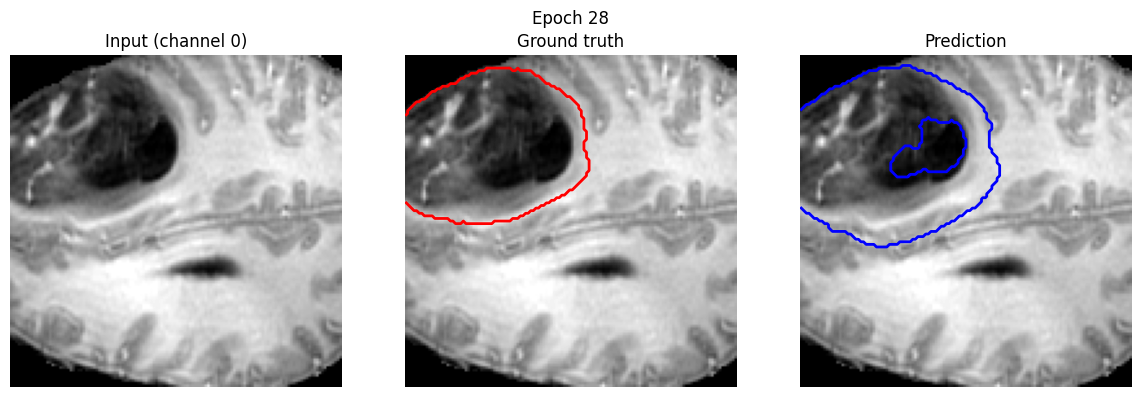

  Loss: 0.3034, Val Dice: 0.8660
Epoch 29/50


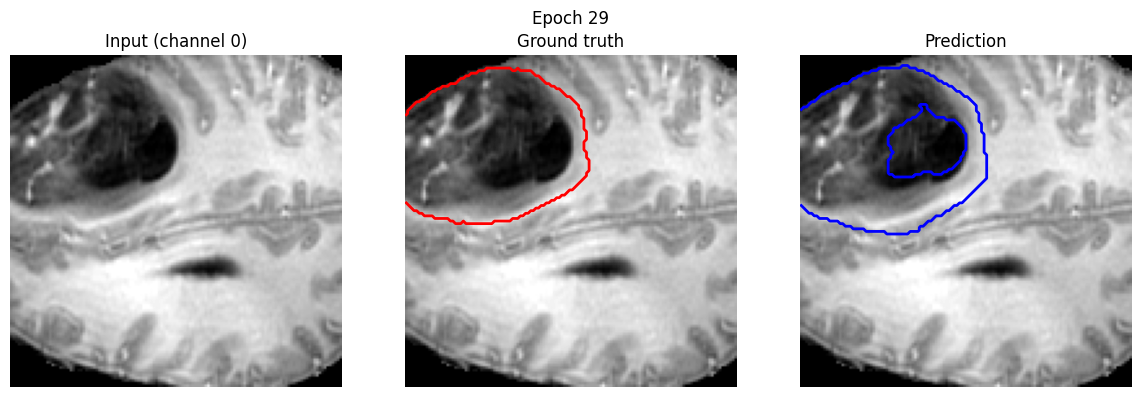

  Loss: 0.3020, Val Dice: 0.8383
Epoch 30/50


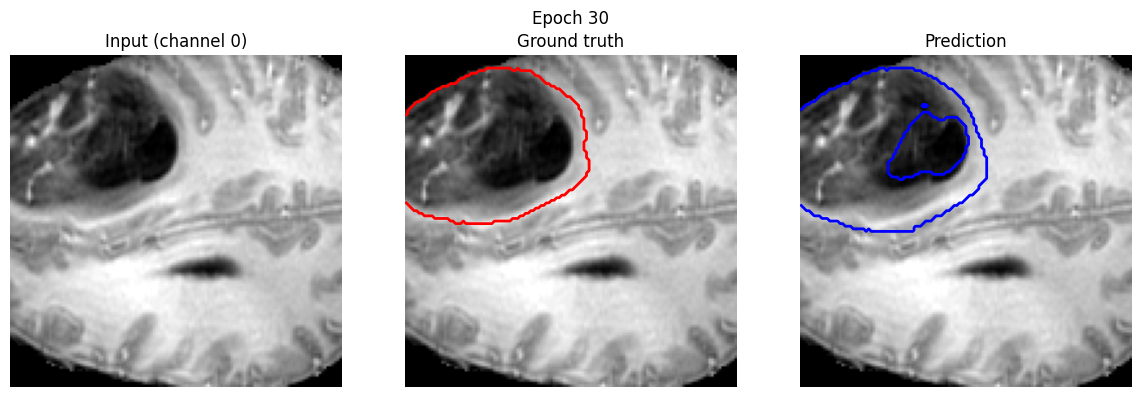

  Loss: 0.2939, Val Dice: 0.8346
Epoch 31/50


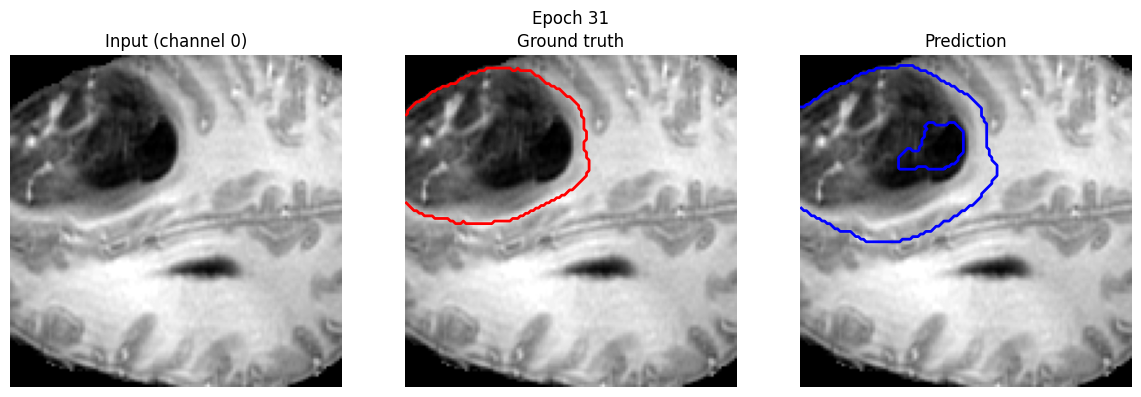

  Loss: 0.3002, Val Dice: 0.8689
Epoch 32/50


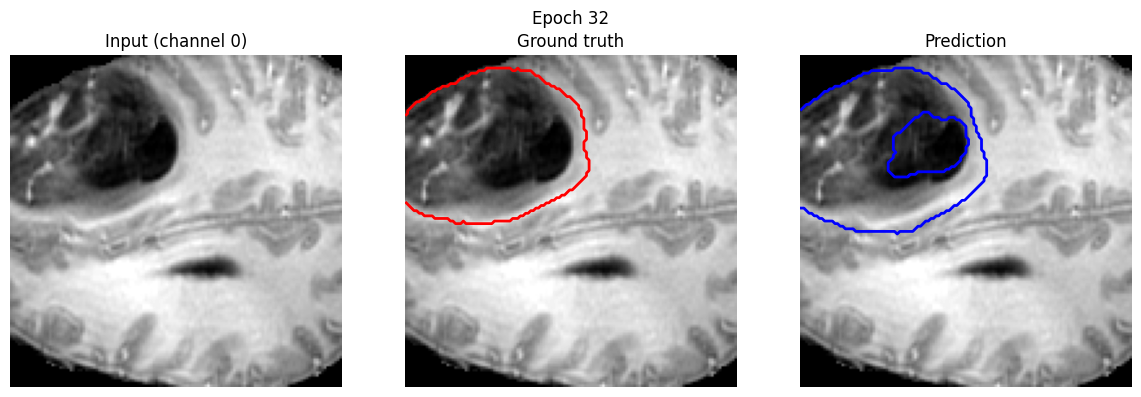

  Loss: 0.2976, Val Dice: 0.8549
Epoch 33/50


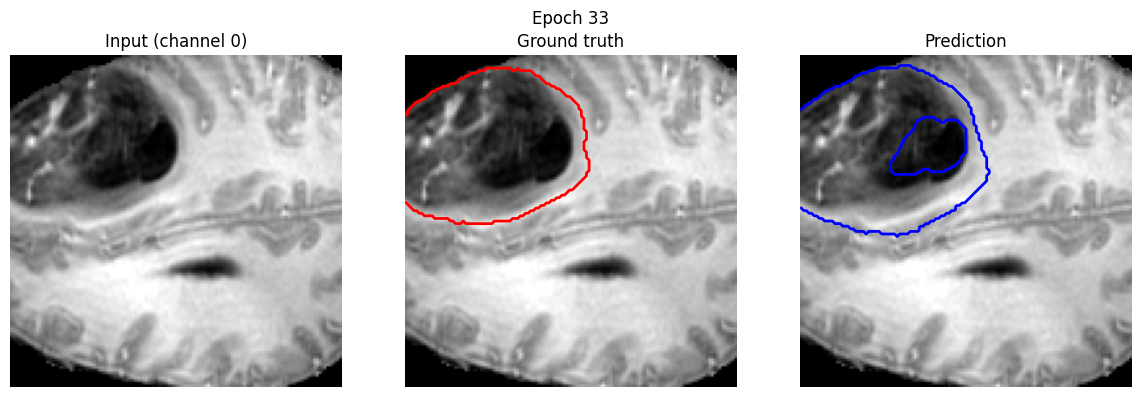

  Loss: 0.3094, Val Dice: 0.8686
Epoch 34/50


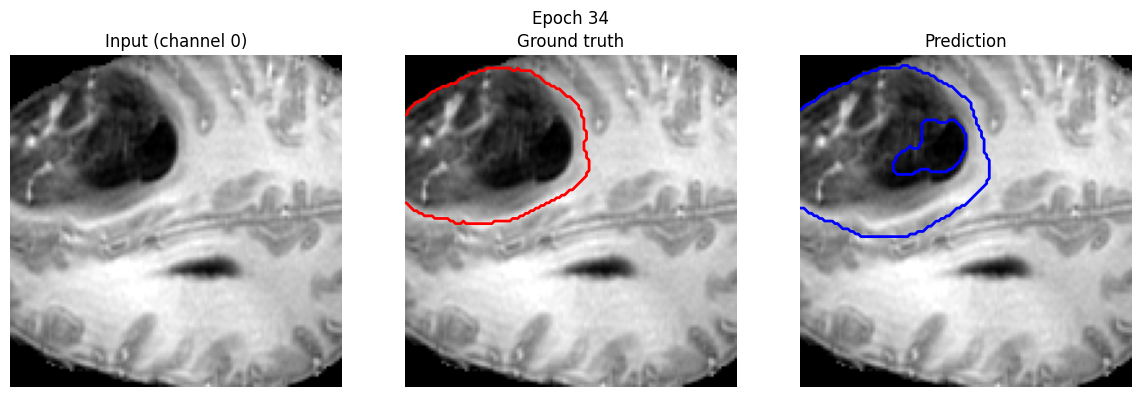

  Loss: 0.3037, Val Dice: 0.8358
Epoch 35/50


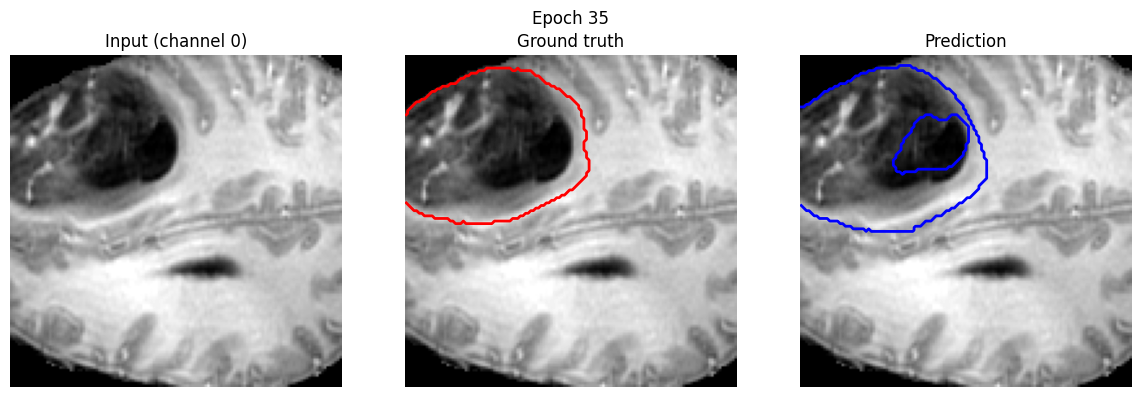

  Loss: 0.2817, Val Dice: 0.8630
Epoch 36/50


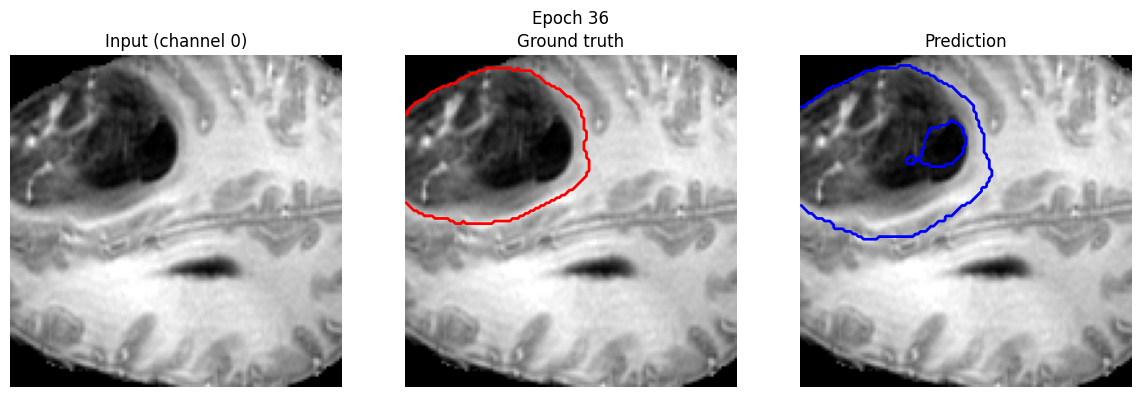

  Loss: 0.2822, Val Dice: 0.8679
Epoch 37/50


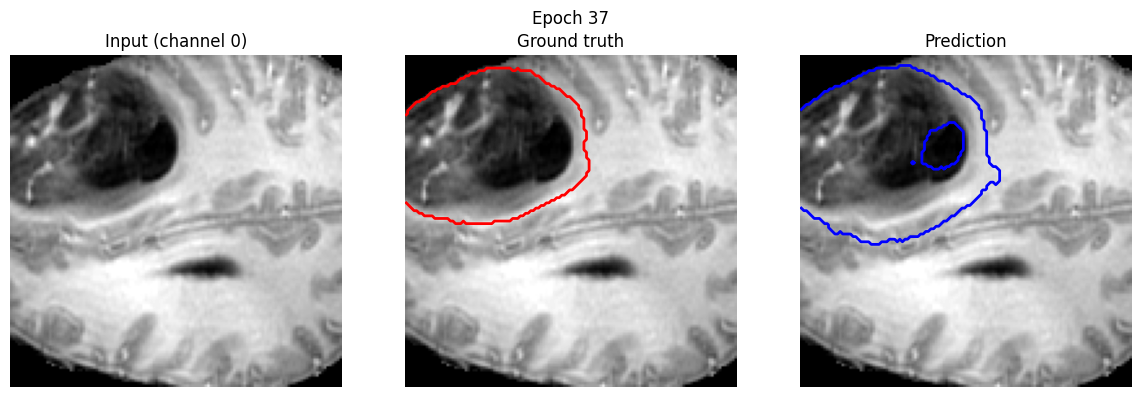

  Loss: 0.2901, Val Dice: 0.8781
Epoch 38/50


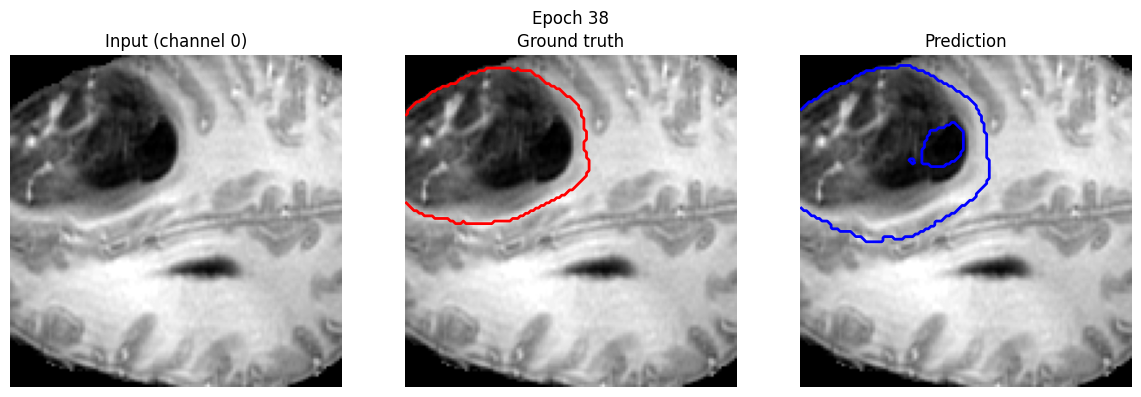

  Loss: 0.2833, Val Dice: 0.8806
Epoch 39/50


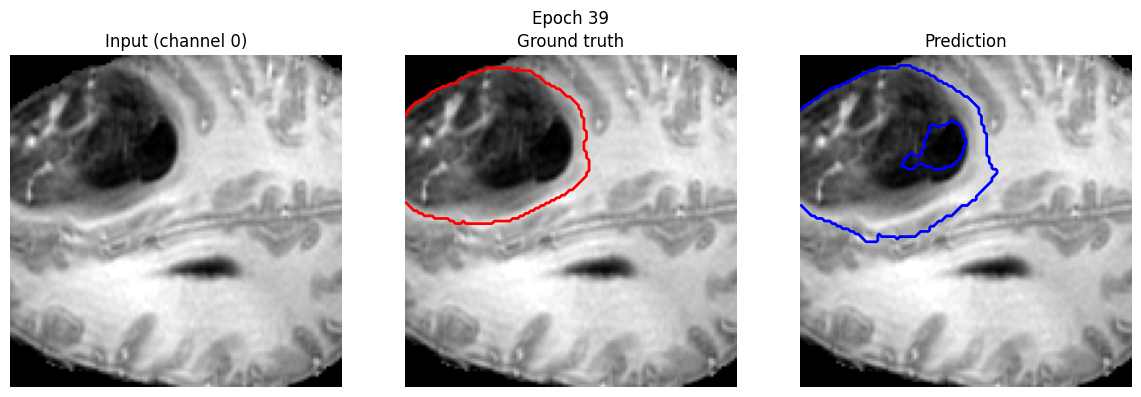

  Loss: 0.2863, Val Dice: 0.8779
Epoch 40/50


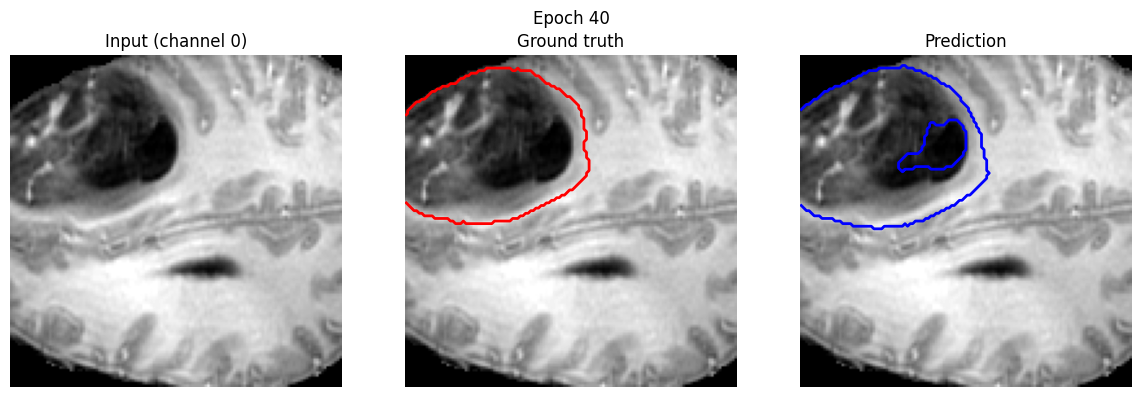

  Loss: 0.2734, Val Dice: 0.8516
Epoch 41/50


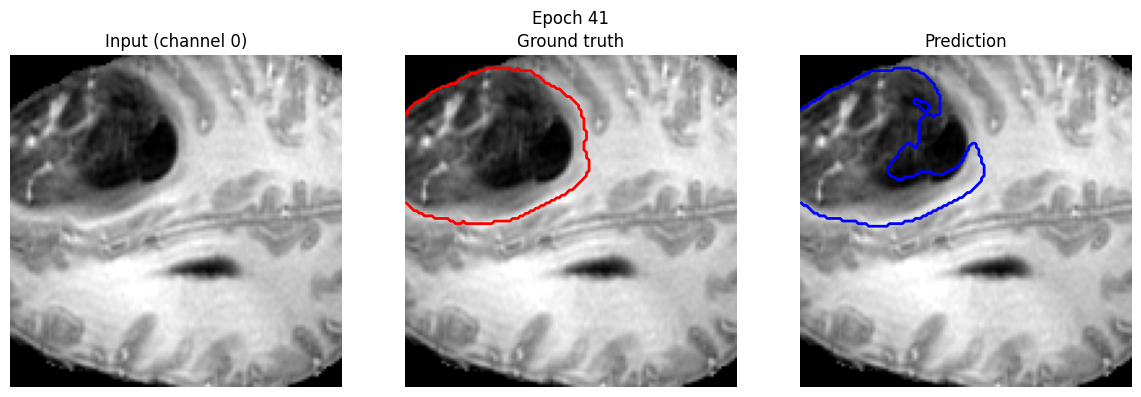

  Loss: 0.2706, Val Dice: 0.8100
Epoch 42/50


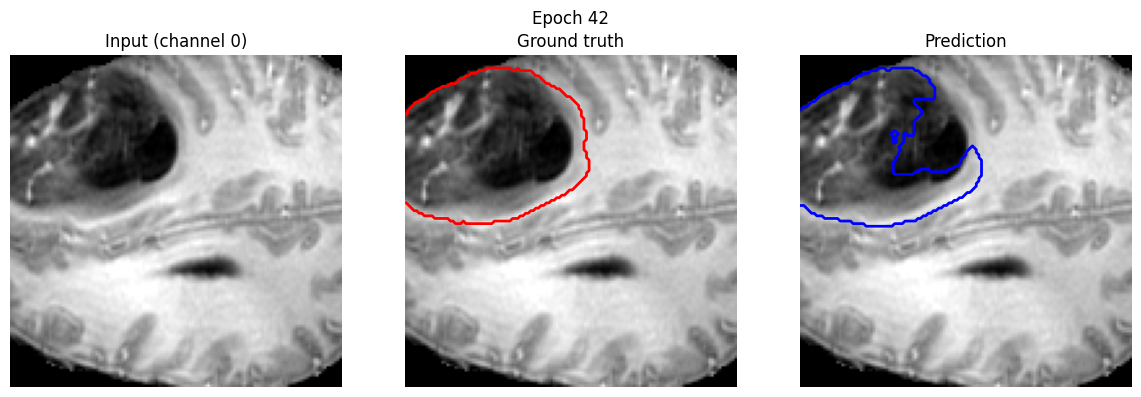

  Loss: 0.2751, Val Dice: 0.8338
Epoch 43/50


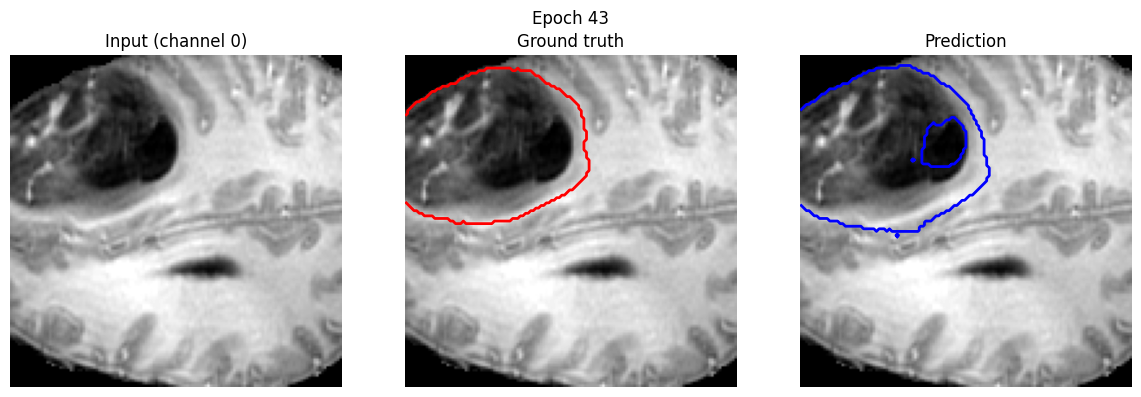

  Loss: 0.2831, Val Dice: 0.8632
Epoch 44/50


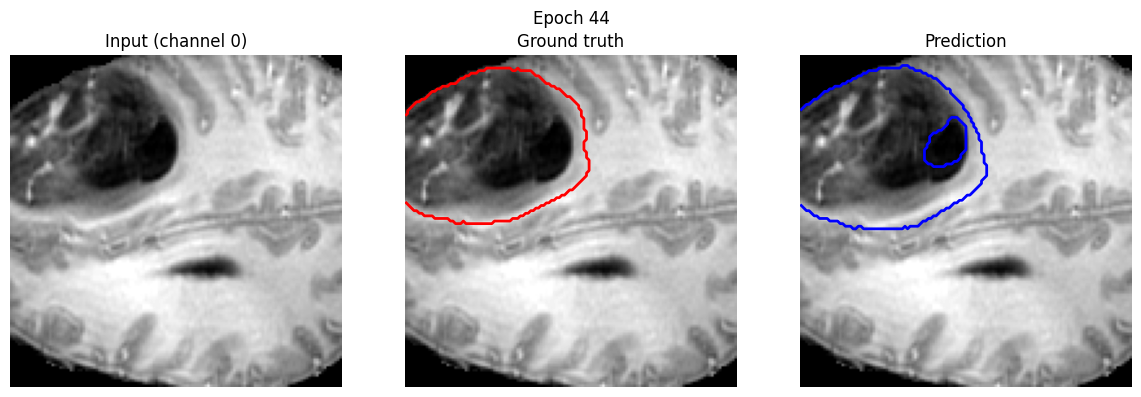

  Loss: 0.2732, Val Dice: 0.8689
Epoch 45/50


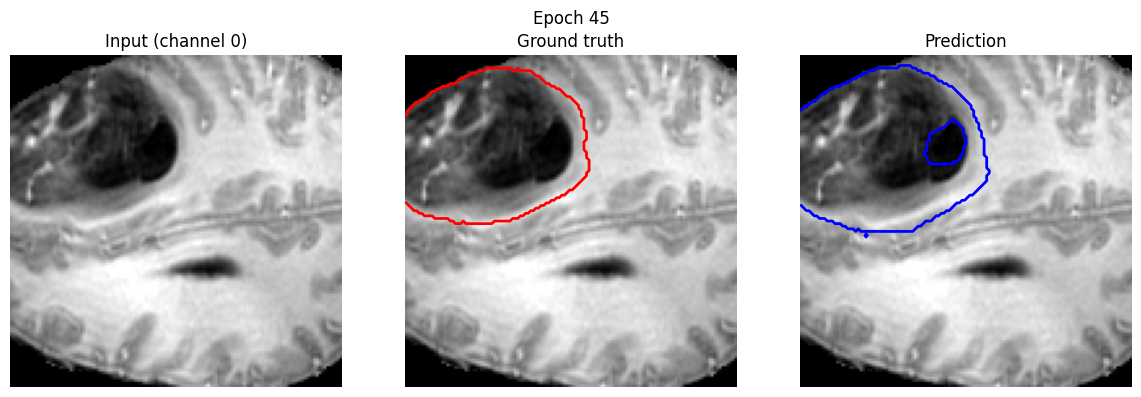

  Loss: 0.2673, Val Dice: 0.8628
Epoch 46/50


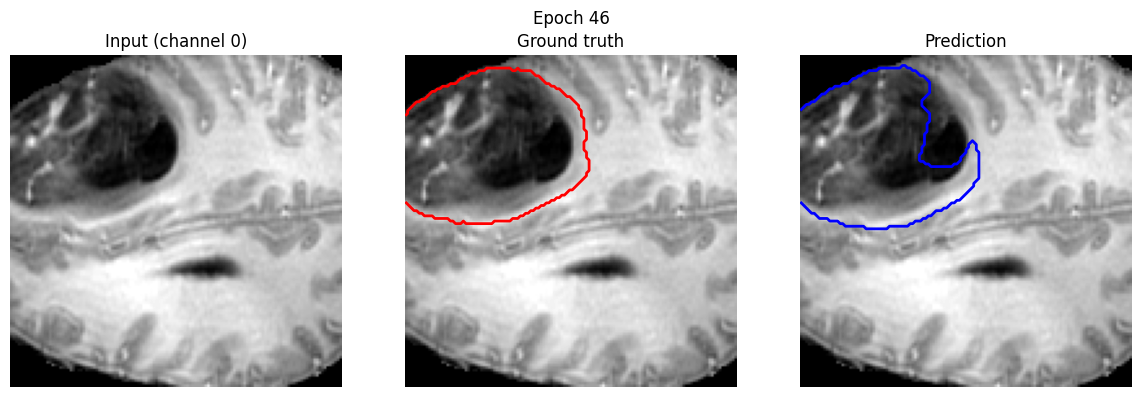

  Loss: 0.2599, Val Dice: 0.8591
Epoch 47/50


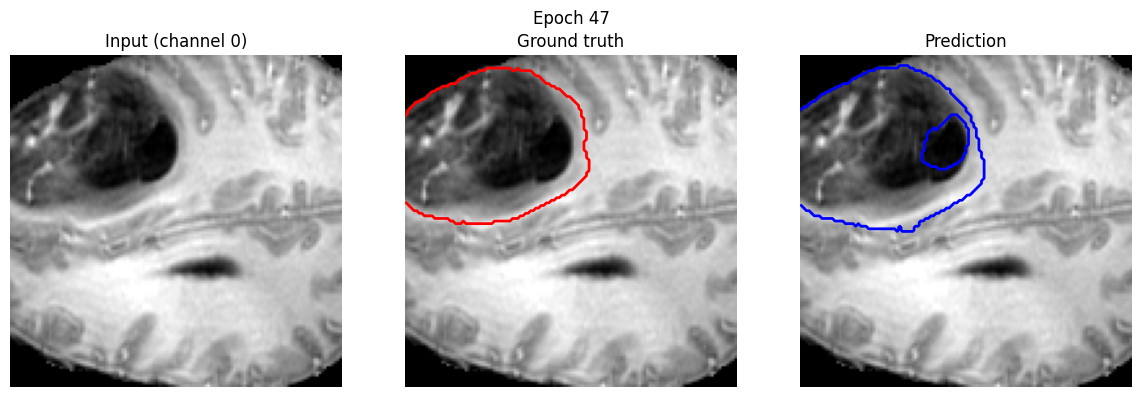

  Loss: 0.2748, Val Dice: 0.8606
Epoch 48/50


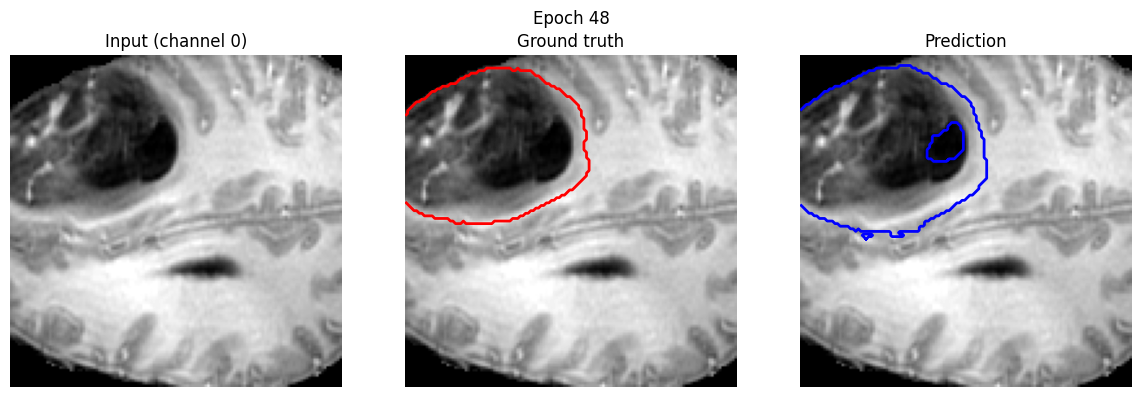

  Loss: 0.2839, Val Dice: 0.8835
Epoch 49/50


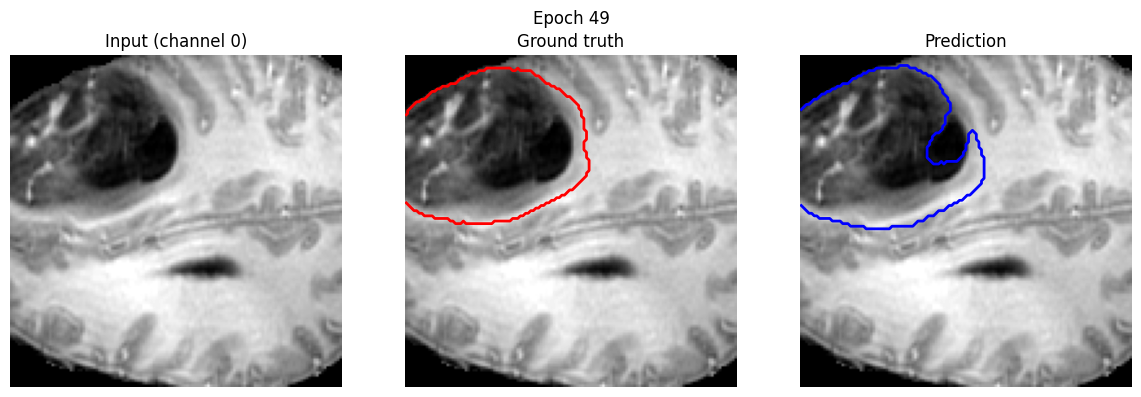

  Loss: 0.2647, Val Dice: 0.8719
Epoch 50/50


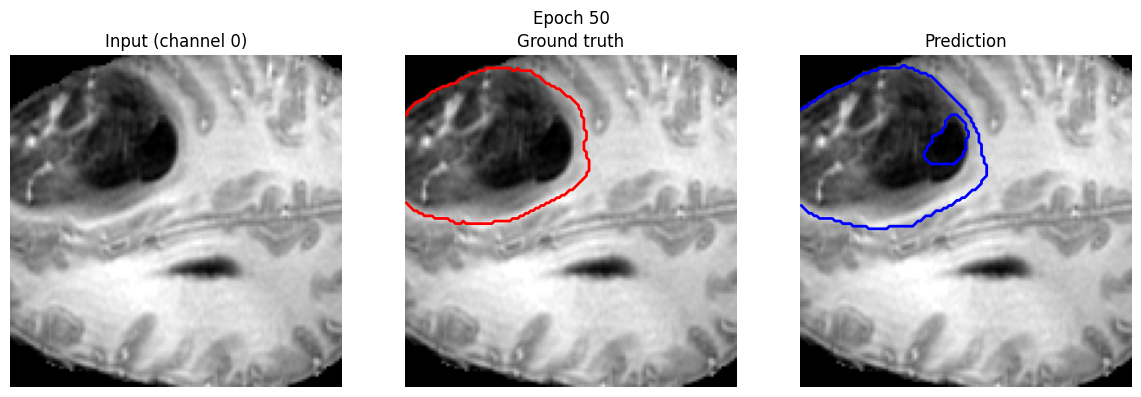

  Loss: 0.2562, Val Dice: 0.8724


In [2]:
import yaml
with open("../configs/segmentation_simple.yaml") as f:
    cfg = yaml.safe_load(f)

from utils.training import train_segmentation
from utils.data_utils import get_seg2d_dataloaders
from utils.vis_utils import show_overlay

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"
train_loader, val_loader = get_seg2d_dataloaders(
    data_dir=cfg["data"]["data_dir"],
    batch_size=cfg["data"]["batch_size"],
    target_size=tuple(cfg["data"]["target_size"]),
    val_fraction=cfg["data"]["val_fraction"],
)

model = build_simple_model(cfg["model"]).to(device)

loss_fn = DiceCELoss(sigmoid=True, to_onehot_y=False)
dice_metric = DiceMetric(include_background=True, reduction="mean")
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

train_losses, val_dices, best_dice, best_weights = train_segmentation(
    model, train_loader, val_loader,
    loss_fn, dice_metric, optimizer,
    device=device, max_epochs=50,
    overlay_fn=show_overlay
)